# Multiple Linear Regression

In [10]:
# Now we are going to implement the mutipltle linear regression
# importing the required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# Now we are read the data from the csv file
df=pd.read_csv("Exp-5 House Price.csv")

In [12]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


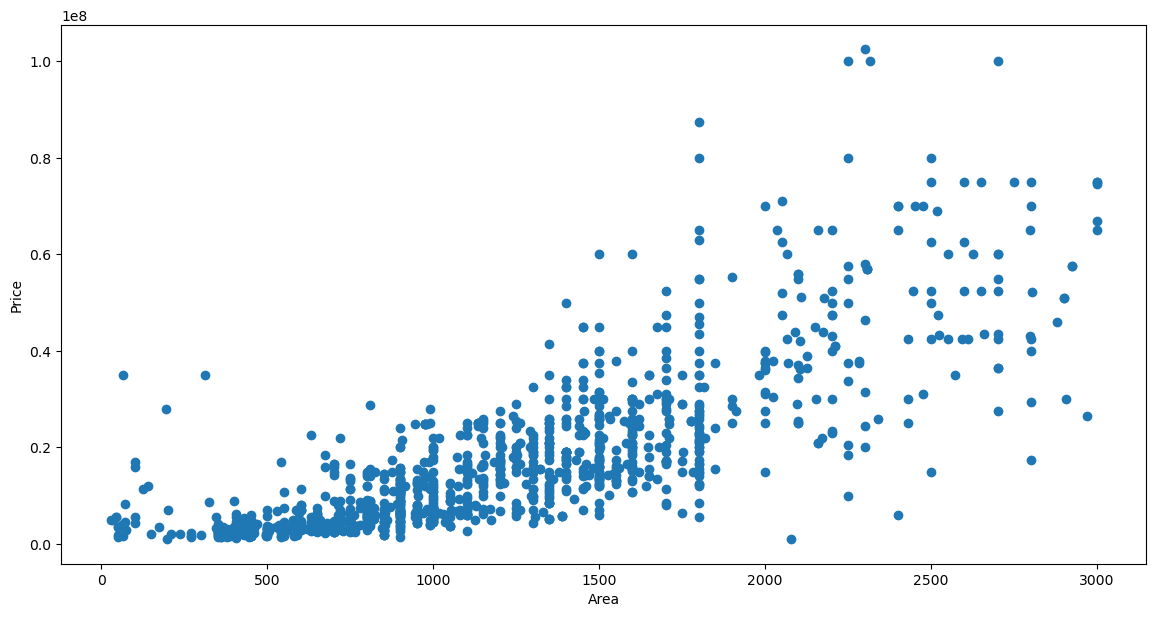

In [13]:
# drpping the values from the table which is greater than 3000 and plotting between Area and Price
df.drop(df[df['Area']>3000].index,inplace=True)
plt.figure(figsize=(14,7))
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area,df.Price)

# The above graph shows the relation ship that with increase in the are price of the house get increase


In [15]:
# importing the encoder and encoding the required fields
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [16]:
df['Furnishing']=lb.fit_transform(df['Furnishing'])

In [17]:
df['Locality']=lb.fit_transform(df['Locality'])

In [23]:
df['Status']=lb.fit_transform(df['Status'])

In [24]:
df['Transaction']=lb.fit_transform(df['Transaction'])

In [25]:
df['Type']=lb.fit_transform(df['Type'])

In [26]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,277,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,136,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,48,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,275,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,276,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1,213,1.0,26000000,1,1,1,12916.0
1253,1200.0,3,3.0,1,43,1.0,16500000,1,1,1,12916.0
1255,1050.0,3,2.0,1,43,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,43,3.0,17500000,1,0,1,12916.0


In [27]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,277,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,136,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,48,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,275,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,276,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1,213,1.0,26000000,1,1,1,12916.0
1253,1200.0,3,3.0,1,43,1.0,16500000,1,1,1,12916.0
1255,1050.0,3,2.0,1,43,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,43,3.0,17500000,1,0,1,12916.0


In [28]:
# dropping the null values from the dataset
df1=df.dropna()

In [29]:
df1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,1,136,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,48,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,275,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,276,1.0,6200000,1,0,1,6667.0
5,1300.0,4,3.0,1,275,1.0,15500000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1,213,1.0,26000000,1,1,1,12916.0
1253,1200.0,3,3.0,1,43,1.0,16500000,1,1,1,12916.0
1255,1050.0,3,2.0,1,43,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,43,3.0,17500000,1,0,1,12916.0


In [30]:
df1.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,9.400000e+02,940.000000,940.000000,940.000000,940.000000
mean,1202.590934,2.692553,2.443617,1.152128,186.487234,1.661702,1.760809e+07,0.945745,0.617021,0.535106,14481.082979
std,637.367941,0.893801,0.964775,0.650424,102.175166,3.312998,1.719176e+07,0.226641,0.486372,0.499032,18593.845532
min,28.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+06,0.000000,0.000000,0.000000,1667.000000
25%,750.000000,2.000000,2.000000,1.000000,113.000000,1.000000,5.000000e+06,1.000000,0.000000,0.000000,6154.000000
50%,1100.000000,3.000000,2.000000,1.000000,176.000000,1.000000,1.250000e+07,1.000000,1.000000,1.000000,10590.500000
75%,1600.000000,3.000000,3.000000,2.000000,275.000000,2.000000,2.472500e+07,1.000000,1.000000,1.000000,17181.250000
max,3000.000000,7.000000,6.000000,2.000000,357.000000,39.000000,1.025000e+08,1.000000,1.000000,1.000000,183333.000000


In [32]:
df['Per_Sqft'].isnull().sum()

237

In [35]:
df['Parking'].fillna(int(df['Parking'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_24416\1040940465.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Parking'].fillna(int(df['Parking'].mode()),inplace=True)


In [36]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       237
dtype: int64

In [37]:
df['Bathroom'].fillna(int(df['Bathroom'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_24416\4159368307.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Bathroom'].fillna(int(df['Bathroom'].mode()),inplace=True)


In [38]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       0
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       237
dtype: int64

In [39]:
df['Per_Sqft'].fillna(int(df['Per_Sqft'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_24416\3863059702.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Per_Sqft'].fillna(int(df['Per_Sqft'].mode()),inplace=True)


In [40]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [43]:
X=df1[['Area','BHK','Bathroom','Furnishing','Locality','Parking','Status','Transaction','Type']]
Y=df1['Price']

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [45]:
X_train.shape

(752, 9)

In [46]:
X_test.shape

(188, 9)

In [47]:
Y_train.shape

(752,)

In [48]:
Y_test.shape

(188,)

In [50]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [52]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [54]:
Y_pred=lr.predict(X_test)

In [57]:

print(f"Accuracy of Test Data is {round(lr.score(X_test, Y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(lr.score(X_train, Y_train)*100,2)}%")

Accuracy of Test Data is 71.24%
Accuracy of Training Data is 67.87%


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
print(mean_absolute_error(Y_test,Y_pred))

8308429.434233357
6221254.160460469


# Linear Regression on Boston Houses Dataset

Exploratory Analysis

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv("Exp-5 House Price.csv")

In [110]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [111]:
df.head(n=5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


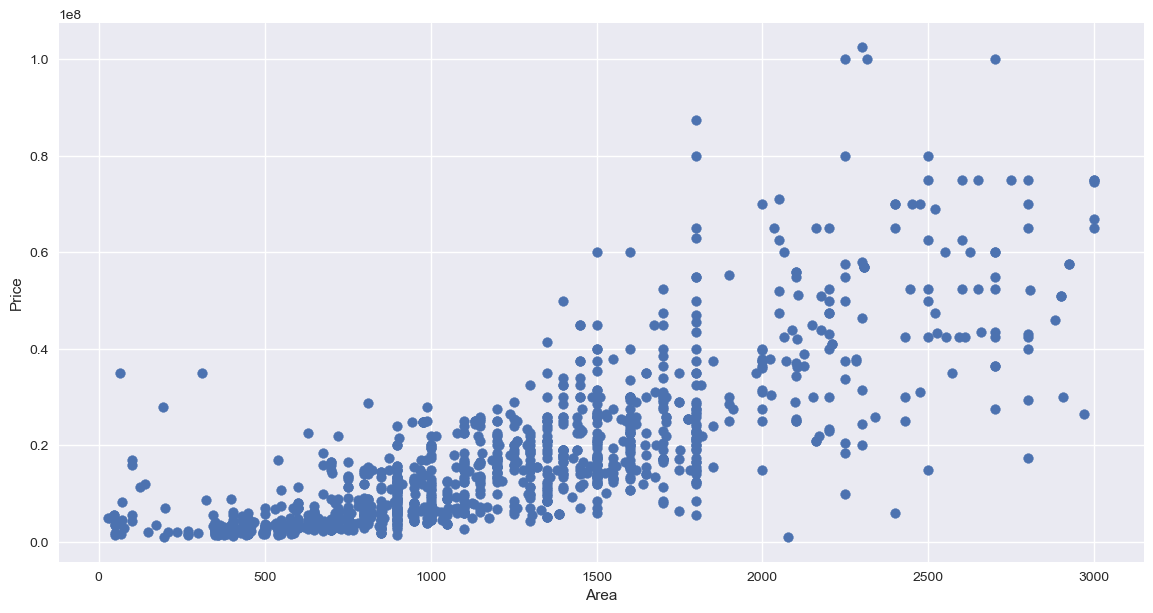

In [112]:
# drpping the values from the table which is greater than 3000 and plotting between Area and Price
df.drop(df[df['Area']>3000].index,inplace=True)
plt.figure(figsize=(14,7))
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area,df.Price)

In [113]:
# importing the encoder and encoding the required fields
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [114]:
df['Furnishing']=lb.fit_transform(df['Furnishing'])
df['Locality']=lb.fit_transform(df['Locality'])
df['Status']=lb.fit_transform(df['Status'])
df['Transaction']=lb.fit_transform(df['Transaction'])
df['Type']=lb.fit_transform(df['Type'])

In [115]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,277,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,136,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,48,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,275,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,276,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1,213,1.0,26000000,1,1,1,12916.0
1253,1200.0,3,3.0,1,43,1.0,16500000,1,1,1,12916.0
1255,1050.0,3,2.0,1,43,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,43,3.0,17500000,1,0,1,12916.0


In [116]:
df1=df.dropna()

In [117]:
df1.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,9.400000e+02,940.000000,940.000000,940.000000,940.000000
mean,1202.590934,2.692553,2.443617,1.152128,186.487234,1.661702,1.760809e+07,0.945745,0.617021,0.535106,14481.082979
std,637.367941,0.893801,0.964775,0.650424,102.175166,3.312998,1.719176e+07,0.226641,0.486372,0.499032,18593.845532
min,28.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+06,0.000000,0.000000,0.000000,1667.000000
25%,750.000000,2.000000,2.000000,1.000000,113.000000,1.000000,5.000000e+06,1.000000,0.000000,0.000000,6154.000000
50%,1100.000000,3.000000,2.000000,1.000000,176.000000,1.000000,1.250000e+07,1.000000,1.000000,1.000000,10590.500000
75%,1600.000000,3.000000,3.000000,2.000000,275.000000,2.000000,2.472500e+07,1.000000,1.000000,1.000000,17181.250000
max,3000.000000,7.000000,6.000000,2.000000,357.000000,39.000000,1.025000e+08,1.000000,1.000000,1.000000,183333.000000


In [118]:
df['Per_Sqft'].isnull().sum()

237

In [119]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Locality         0
Parking         32
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       237
dtype: int64

In [120]:
df['Per_Sqft'].fillna(int(df['Per_Sqft'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_24416\3863059702.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Per_Sqft'].fillna(int(df['Per_Sqft'].mode()),inplace=True)


In [121]:
df.isnull().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      0
Locality        0
Parking        32
Price           0
Status          0
Transaction     0
Type            0
Per_Sqft        0
dtype: int64

In [122]:
df['Parking'].fillna(int(df['Parking'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_24416\1040940465.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Parking'].fillna(int(df['Parking'].mode()),inplace=True)


In [123]:
df['Bathroom'].fillna(int(df['Bathroom'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_24416\4159368307.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Bathroom'].fillna(int(df['Bathroom'].mode()),inplace=True)


In [124]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [125]:
X=df1[['Area','BHK','Bathroom','Furnishing','Locality','Parking','Status','Transaction','Type']]
Y=df1['Price']

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [127]:
X_train.shape

(752, 9)

In [128]:
X_test.shape

(188, 9)

In [129]:
Y_train.shape

(752,)

In [130]:
Y_test.shape

(188,)

In [131]:
# Now we are going to normalize the give data
import numpy as np
u=np.mean(X,axis=0)
std=np.std(X,axis=0)

In [132]:
X=(X-u)/std

In [133]:
X

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type
1,-0.710472,-0.775253,-0.460059,-0.234014,-0.494387,-0.199835,0.239516,-1.269296,-1.072861
2,-0.396514,-0.775253,-0.460059,-1.772290,-1.356112,-0.199835,0.239516,0.787839,-1.072861
3,-0.945940,-0.775253,-0.460059,-0.234014,0.866746,-0.199835,0.239516,0.787839,0.932088
4,-0.867450,-0.775253,-0.460059,-0.234014,0.876538,-0.199835,0.239516,-1.269296,0.932088
5,0.152912,1.463573,0.577004,-0.234014,0.866746,-0.199835,0.239516,-1.269296,0.932088
...,...,...,...,...,...,...,...,...,...
1252,0.937805,0.344160,0.577004,-0.234014,0.259622,-0.199835,0.239516,0.787839,0.932088
1253,-0.004067,0.344160,0.577004,-0.234014,-1.405074,-0.199835,0.239516,0.787839,0.932088
1255,-0.239535,0.344160,-0.460059,-0.234014,-1.405074,0.404169,0.239516,0.787839,0.932088
1256,-0.514248,0.344160,0.577004,-0.234014,-1.405074,0.404169,0.239516,-1.269296,0.932088


In [134]:
X.shape

(940, 9)

In [135]:
Y.shape

(940,)

In [137]:
ones=np.ones((X.shape[0],1))
X=np.hstack((X,ones))
print(X.shape)

(940, 10)


In [141]:
def hypothesis(x, theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ += (theta[i] * x[i])
    return y_

def error(X,Y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (Y[i] - y_)**2
    return e / m

def gradient(X, Y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    # for all values of j
    for j in range(n):
        for i in range(m):
            # sum over all examples
            y_ = hypothesis(X[i], theta)
            grad[j] += (y_ - Y[i]) * X[i][j]
    return grad / m
    
def gradient_descent(X, Y, learning_rate=0.1, max_epochs=300):
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X, Y, theta)
        error_list.append(e)
        
        grad = gradient(X, Y, theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate * grad[j]
    return theta, error_list

In [144]:
import time
start=time.time()
theta,error_list=gradient_descent(X,Y)
end=time.time()
print("Time taken is",end)

KeyError: 0

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [146]:
df=pd.read_csv('HousingData.csv')

In [147]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [148]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [149]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [150]:
X=df.iloc[:,-1] # it will only select last wali row

In [151]:
X

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [152]:
Y=df.iloc[:,:-1]

In [153]:
Y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [154]:
X.shape

(506,)

In [155]:
Y.shape

(506, 13)

In [156]:
# if we have to  find the mean for a particulr column so we will find the mean across axis=0
u=np.mean(Y,axis=0)
std=np.std(Y,axis=0)

In [157]:
u

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
dtype: float64

In [158]:
std

CRIM         8.711216
ZN          23.364801
INDUS        6.828860
CHAS         0.255078
NOX          0.115763
RM           0.701923
AGE         27.970692
DIS          2.103628
RAD          8.698651
TAX        168.370495
PTRATIO      2.162805
B           91.204607
LSTAT        7.148505
dtype: float64

In [159]:
#Normalisation of the data
Y=(Y-u)/std

In [160]:
#Normalised data
Y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,NaN


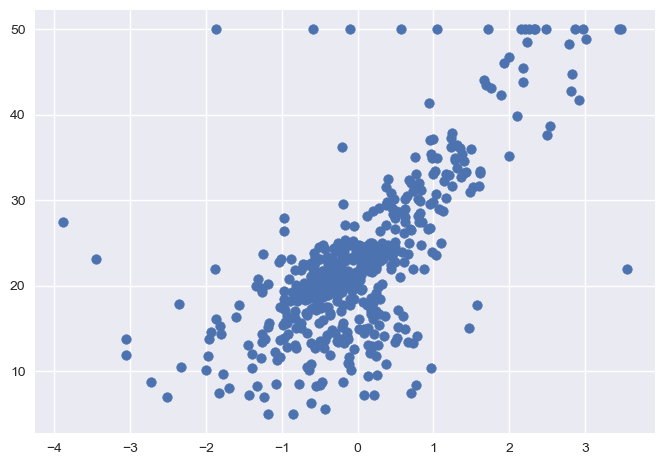

In [161]:
# import matplotlib.pyplot as plt
plt.scatter(Y.iloc[:,5],X)
plt.show()

In [162]:
X.shape

(506,)

In [163]:
Y.shape

(506, 13)

In [164]:
import numpy as np
ones=np.ones((Y.shape[0],1))
Y=np.hstack((ones,Y))
print(Y.shape)

(506, 14)


In [165]:
Y[:4,:4]

array([[ 1.        , -0.4138979 ,  0.2905253 , -1.28483988],
       [ 1.        , -0.41148837, -0.47986431, -0.58779822],
       [ 1.        , -0.41149066, -0.47986431, -0.58779822],
       [ 1.        , -0.41090751, -0.47986431, -1.30387674]])

In [182]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list
    


In [183]:
import time
start=time.time()
theta,error_list=gradient_descent(Y,X)
end=time.time()
print("Time taken is",end-start)

Time taken is 0.1591789722442627


In [184]:
print(theta)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [185]:
print(error_list)

[454.21784584980236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

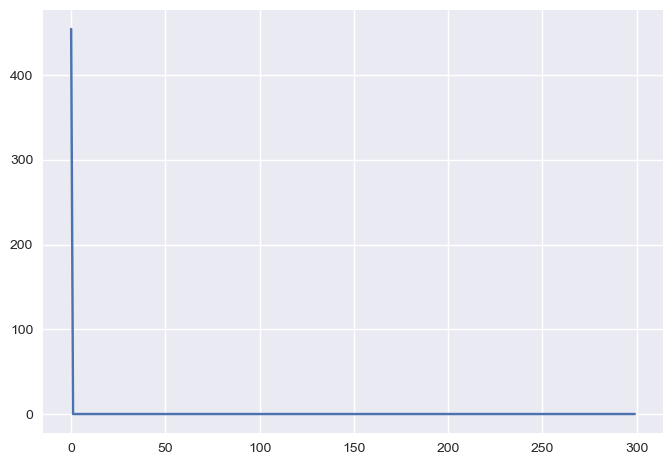

In [186]:
plt.plot(error_list)
plt.show()

In [178]:
y_ = []

for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

IndexError: tuple index out of range

In [179]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score(1-num/denom)
    return score*100

In [ ]:
# efficent way of optimizing the code using Vectorization
# An efficent way of implementing the multiple lineaar regression without using the loops
# hence it will decrease the time for the implementation of the coe
def hypothesis(X,theta):
    return np.dot(X,theta)
def error(X,y,theta):
    m=X.shape[0]
    y_hypothesis(X,theta)
    e=np.sum(y-y_)**2
    return e/m
def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y-y_))
    m=X.shape[0]
    return grad/m
def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
     n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list